In [1]:
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [15]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False
2398,706,42,8,95386.82,1,1,1,75732.25,False,True,False
5906,788,32,4,112079.58,1,0,0,89368.59,False,False,True
2343,706,38,5,163034.82,2,1,1,135662.17,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,False,False,False
2899,586,35,7,0.00,2,1,0,70760.69,False,False,False
9549,578,36,1,157267.95,2,1,0,141533.19,False,True,True
2740,650,34,4,142393.11,1,1,1,11276.48,True,False,True


In [16]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 3s 7ms/step - loss: 0.4939 - accuracy: 0.7958 - val_loss: 0.4828 - val_accuracy: 0.7969
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4715 - accuracy: 0.7958 - val_loss: 0.4603 - val_accuracy: 0.7969
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 0.4482 - accuracy: 0.7958 - val_loss: 0.4426 - val_accuracy: 0.7969
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.4335 - accuracy: 0.8005 - val_loss: 0.4348 - val_accuracy: 0.8119
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.4269 - accuracy: 0.8100 - val_loss: 0.4317 - val_accuracy: 0.8125
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.4240 - accuracy: 0.8131 - val_loss: 0.4302 - val_accuracy: 0.8069
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4222 - accuracy: 0.8138 - val_loss: 0.4287 - val_accuracy: 0.8081
Epoch 

In [ ]:
model.layers[0].get_weights()

[array([[-9.22566578e-02, -9.92746353e-02, -3.42184544e-01,
          6.65969122e-03,  7.10045993e-02, -2.73597807e-01,
         -1.82794765e-01, -1.53056189e-01,  1.63119003e-01,
         -2.53392816e-01, -3.63801867e-01],
        [ 1.50862396e+00, -1.31688511e+00,  1.01149726e+00,
          1.72775126e+00, -2.73318857e-01,  1.41060388e+00,
         -1.75463125e-01, -1.38454211e+00, -1.92212939e-01,
         -5.65079272e-01,  1.19276237e+00],
        [-2.04647422e-01,  9.63211991e-03,  1.29547626e-01,
          1.04640685e-01,  5.29493868e-01, -5.73442020e-02,
          9.52314883e-02, -1.01121888e-01,  1.64653987e-01,
          1.25091965e-03, -2.06928346e-02],
        [ 1.50433511e-01, -1.50439128e-01,  4.06556189e-01,
         -2.05319732e-01,  1.75922737e-01,  2.59228498e-01,
         -4.91954267e-01, -2.16490984e-01, -6.53146744e-01,
          2.57930279e-01,  2.39408880e-01],
        [-1.49250343e-01, -1.30912080e-01,  4.62519862e-02,
          1.74198244e-02, -1.35464221e-01, -

In [ ]:
model.layers[1].get_weights()

[array([[-0.02307432, -0.7815142 , -0.6320756 , -0.6140784 ,  0.74383014,
         -0.90751165,  0.6317329 , -0.4421369 ,  0.1123018 , -0.02871531,
         -0.7645799 ],
        [ 0.6475022 ,  0.09495844,  0.07822066,  0.495157  , -0.80057424,
          0.15040429,  0.03959296,  0.65802103,  0.62884283, -0.6152538 ,
          0.8528567 ],
        [-0.5631708 , -0.22057794,  0.39263475, -0.04800687, -0.11393013,
         -0.05250498,  0.26751658, -0.18666077,  0.3741335 ,  0.6134615 ,
         -0.36415723],
        [-0.19334671, -0.26510903, -0.38829926, -0.55425394,  0.0034022 ,
         -0.62850654,  0.5960752 , -0.48506156, -0.0288428 ,  0.22470227,
         -0.2915617 ],
        [-0.00219628,  0.56082743,  0.48291296,  0.31194127, -0.6252517 ,
         -0.11439577, -0.12029503,  0.19783986, -0.23755139, -0.47055376,
          0.29520765],
        [-0.47209322, -0.48932418, -0.5464269 , -0.47840878,  0.9021592 ,
          0.00897116, -0.10569766,  0.11794654,  0.09479748,  0.0119512

In [ ]:
model.layers[2].get_weights()

[array([[-0.9017752 ],
        [-0.89484763],
        [-0.7126346 ],
        [-0.35494164],
        [ 0.6488555 ],
        [-0.21363902],
        [ 0.32905543],
        [-0.7922419 ],
        [ 0.00823153],
        [ 0.4380367 ],
        [-0.6082224 ]], dtype=float32),
 array([0.00905474], dtype=float32)]

In [ ]:
ylog= model.predict(X_test_scaled)

63/63 [==============================] - 1s 6ms/step


In [ ]:
y_pred= np.where(ylog > 0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.827

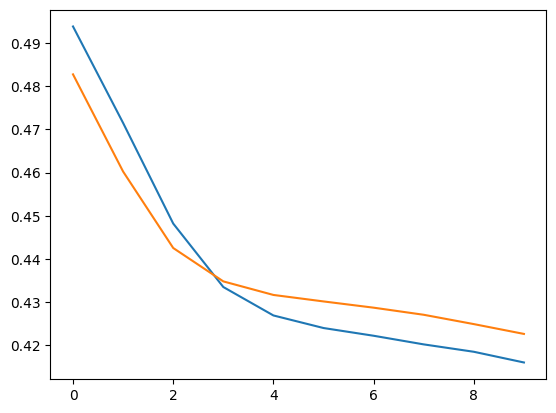

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

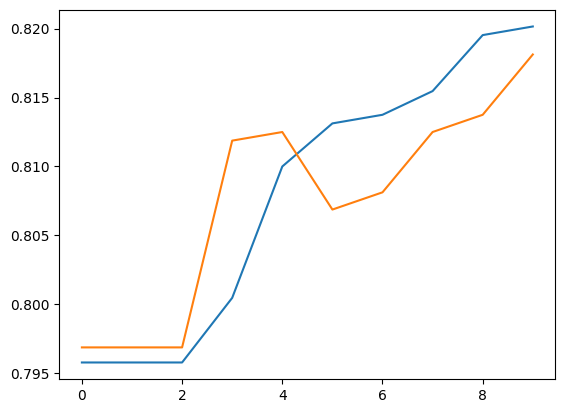

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])